In [24]:
import matplotlib.pyplot as plt
from brain import *
import copy

In [6]:
k = 1e2
n = 1e4
p = 0.1
b = 0.1
T = 10

In [7]:
"""
1. assembly in Concept  <-> Area <-> Stimulus
2. Area' <-> Stimulus
3. assembly in Concept <-> Area'
"""

def test_memorization_time(num_engrams, t_mem, t_recall):
    mem = Memory(k, n, p, b, T)
    concept, all_assemblies = mem.add_concept('Christos', num_engrams)

    stimulus = Stimulus(k, n, p, attribute='Christos')
    fiber = Fiber(n, p, b) # concept <-> area
    fiber_copy = copy.deepcopy(fiber)
    stimulus_copy = copy.deepcopy(stimulus)
    concept_winners = mem.stimulate_WM(stimulus, fiber, t_mem)
    intersection_old_existing = np.array([len(np.intersect1d(concept_winners, asseb)) \
         for asseb in all_assemblies])

    new_concept_winners = mem.stimulate_WM(stimulus_copy, fiber_copy, t_recall)
    intersection = len(np.intersect1d(concept_winners, new_concept_winners))
    intersection_new_existing = np.array([len(np.intersect1d(new_concept_winners, asseb)) \
        for asseb in all_assemblies])
    # print(f'num_engrams={num_engrams}, t_mem={t_mem}, t_recall={t_recall}: {len(intersection)}')
    return intersection, intersection_old_existing, intersection_new_existing

In [8]:
num_engrams = 5
all_intersection = np.zeros((20,20))
all_intersection_old = np.zeros((20,20, num_engrams))
all_intersection_new = np.zeros((20,20, num_engrams))

for i in range(20):
    for j in range(20):
        t_mem = (i+1) * 5
        t_recall = (j+1) * 5 
        intersection, intersection_old_existing, intersection_new_existing = \
            test_memorization_time(num_engrams=num_engrams, t_mem=t_mem, t_recall=t_recall)
        all_intersection[i, j] = intersection
        all_intersection_old[i, j] = intersection_old_existing
        all_intersection_new[i, j] = intersection_new_existing

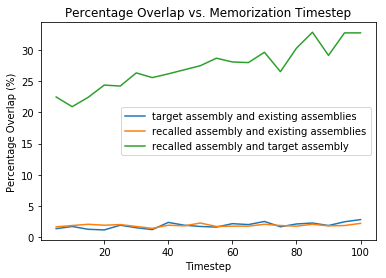

In [23]:
x_range = range(5,101,5)
baseline = np.mean(np.mean(all_intersection_old, axis=2), axis=1)
# baseline_max = np.max(np.mean(all_intersection_old, axis=2), axis=1)/100
# baseline_min = np.min(np.mean(all_intersection_old, axis=2), axis=1)/100
plt.plot(x_range, baseline, label='target assembly and existing assemblies')
# plt.fill_between(x_range, baseline_min, baseline_max, alpha=0.3)

baseline = np.mean(np.mean(all_intersection_new, axis=2), axis=1)
# baseline_max = np.max(np.mean(all_intersection_new, axis=2), axis=1)/100
# baseline_min = np.min(np.mean(all_intersection_new, axis=2), axis=1)/100
plt.plot(x_range, baseline, label='recalled assembly and existing assemblies')
# plt.fill_between(x_range, baseline_min, baseline_max, alpha=0.3)

percentage_results = np.mean(all_intersection, axis=1)
# percentage_results_max = np.max(all_intersection, axis=1)/100
# percentage_results_min = np.min(all_intersection, axis=1)/100
plt.plot(x_range, percentage_results, label='recalled assembly and target assembly')
# plt.fill_between(x_range, percentage_results_min, percentage_results_max, alpha=0.3)

plt.title('Percentage Overlap vs. Memorization Timestep')
plt.xlabel('Timestep')
plt.ylabel('Percentage Overlap (%)')
plt.legend()
plt.savefig('memorization_timestep.jpg')

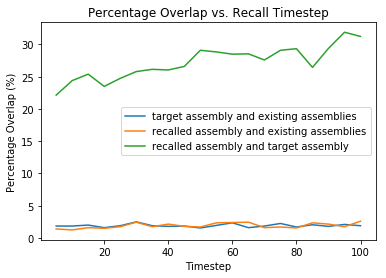

In [22]:
baseline = np.mean(np.mean(all_intersection_old, axis=2), axis=0)
plt.plot(range(5,101,5), baseline, label='target assembly and existing assemblies')
baseline = np.mean(np.mean(all_intersection_new, axis=2), axis=0)
plt.plot(range(5,101,5), baseline, label='recalled assembly and existing assemblies')
percentage_results = np.mean(all_intersection, axis=0)
plt.plot(range(5,101,5), percentage_results, label='recalled assembly and target assembly')

plt.title('Percentage Overlap vs. Recall Timestep')
plt.xlabel('Timestep')
plt.ylabel('Percentage Overlap (%)')
plt.legend()
plt.savefig('recall_timestep.jpg')

In [21]:
np.save('all_intersection_old.npy', all_intersection_old)
np.save('all_intersection_new.npy', all_intersection_new)
np.save('all_intersection.npy', all_intersection)

In [26]:
all_intersection_old = np.load('all_intersection_old.npy')
all_intersection_new = np.load('all_intersection_new.npy')
all_intersection = np.load('all_intersection.npy')

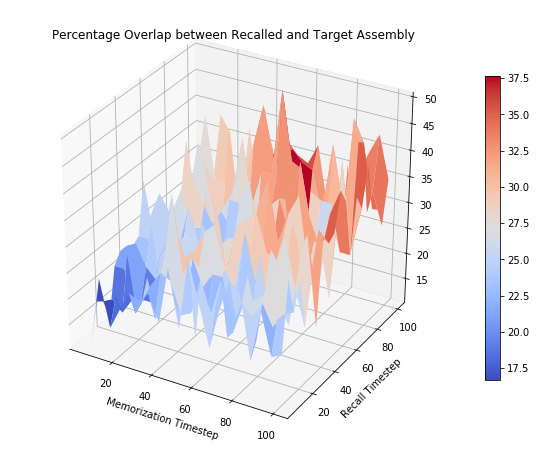

In [29]:
from matplotlib import cm

fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')   # Create the axes

# Data
X = range(5,101,5)
Y = range(5,101,5)
X, Y = np.meshgrid(X, Y)
Z = all_intersection

# Plot the 3d surface
surface = ax.plot_surface(X, Y, Z,
                          cmap=cm.coolwarm,
                          rstride = 2,
                          cstride = 2)

# Set some labels
ax.set_xlabel('Memorization Timestep')
ax.set_ylabel('Recall Timestep')
ax.set_title('Percentage Overlap between Recalled and Target Assembly')
cbar = plt.colorbar(mappable=surface, ax=ax, shrink=0.7)
plt.savefig('percentage_timestep.jpg', bbox_inches='tight')